In [231]:
#pip install ucimlrepo

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [233]:
df = pd.read_csv('/content/train (1).csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [234]:
print("Relation unique values:", df['relation'].unique())

Relation unique values: ['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']


# DATA CLEANING

In [235]:
df = df.replace('?', np.nan)
df = df.dropna()

In [236]:
# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 2 to 797
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               564 non-null    int64  
 1   A1_Score         564 non-null    int64  
 2   A2_Score         564 non-null    int64  
 3   A3_Score         564 non-null    int64  
 4   A4_Score         564 non-null    int64  
 5   A5_Score         564 non-null    int64  
 6   A6_Score         564 non-null    int64  
 7   A7_Score         564 non-null    int64  
 8   A8_Score         564 non-null    int64  
 9   A9_Score         564 non-null    int64  
 10  A10_Score        564 non-null    int64  
 11  age              564 non-null    float64
 12  gender           564 non-null    int64  
 13  ethnicity        564 non-null    int64  
 14  jaundice         564 non-null    int64  
 15  austim           564 non-null    int64  
 16  contry_of_res    564 non-null    int64  
 17  used_app_before  564 

In [238]:
print("Gender unique values:", df['gender'].unique())
print("Ethnicity unique values:", df['ethnicity'].unique())
print("Jaundice unique values:", df['jaundice'].unique())
print("Family Relation unique values:", df['relation'].unique())

Gender unique values: [1 0]
Ethnicity unique values: [ 9  4  6  1  5  2  0  8  7  3 10]
Jaundice unique values: [0 1]
Family Relation unique values: [4 2 3 1 0]


In [239]:
df = df.drop(['result', 'age_desc','used_app_before'], axis=1, errors='ignore')

In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 2 to 797
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             564 non-null    int64  
 1   A1_Score       564 non-null    int64  
 2   A2_Score       564 non-null    int64  
 3   A3_Score       564 non-null    int64  
 4   A4_Score       564 non-null    int64  
 5   A5_Score       564 non-null    int64  
 6   A6_Score       564 non-null    int64  
 7   A7_Score       564 non-null    int64  
 8   A8_Score       564 non-null    int64  
 9   A9_Score       564 non-null    int64  
 10  A10_Score      564 non-null    int64  
 11  age            564 non-null    float64
 12  gender         564 non-null    int64  
 13  ethnicity      564 non-null    int64  
 14  jaundice       564 non-null    int64  
 15  austim         564 non-null    int64  
 16  contry_of_res  564 non-null    int64  
 17  relation       564 non-null    int64  
 18  Class/ASD      

In [242]:
df = df.rename(columns={'Class/ASD': 'target'})

# EDA

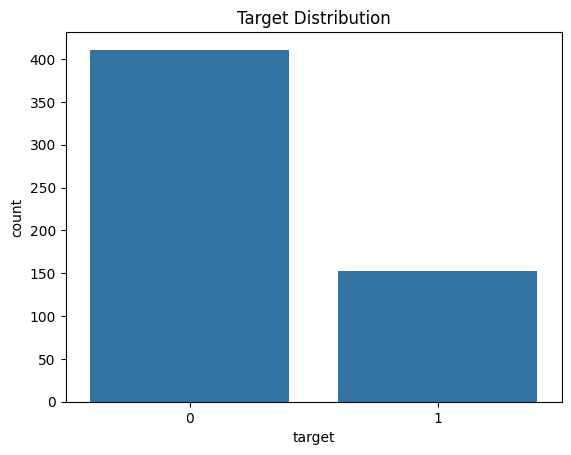

In [243]:
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

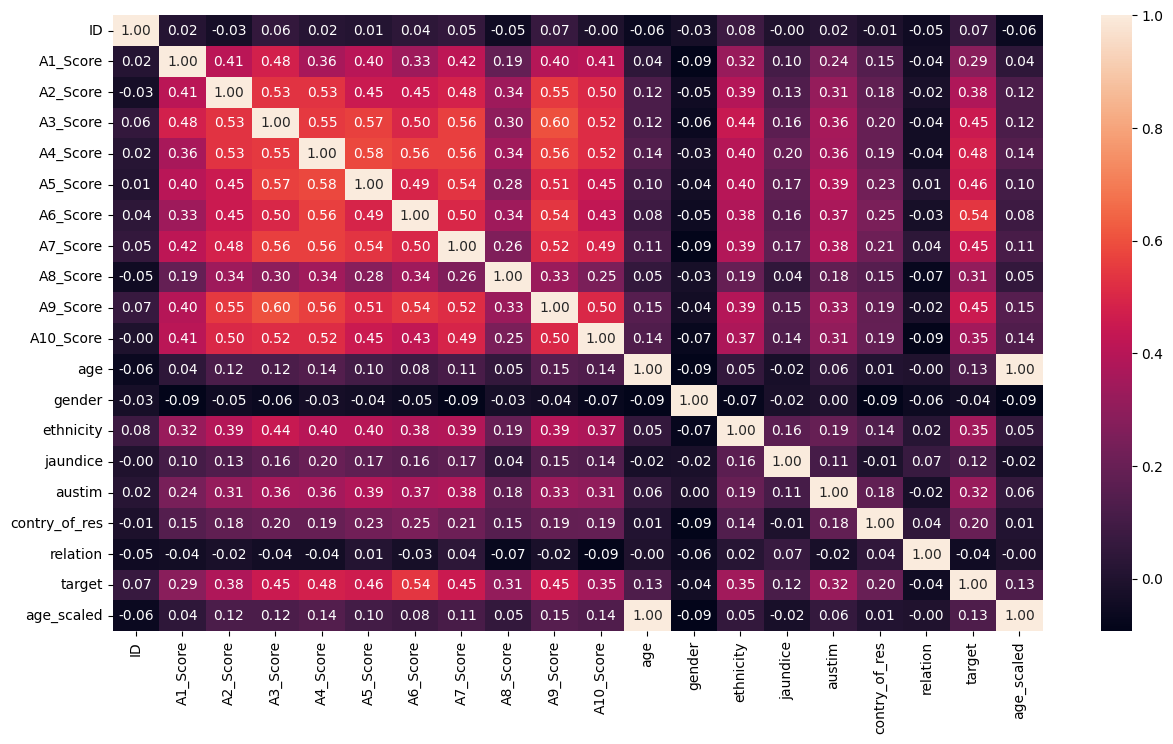

In [244]:
# Correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

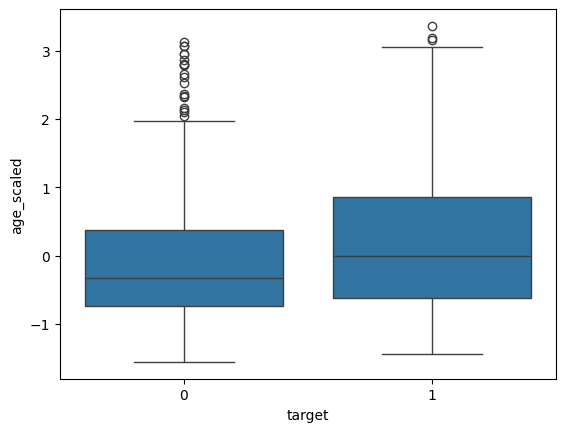

In [245]:
sns.boxplot(x='target', y='age_scaled', data=df)
plt.show()

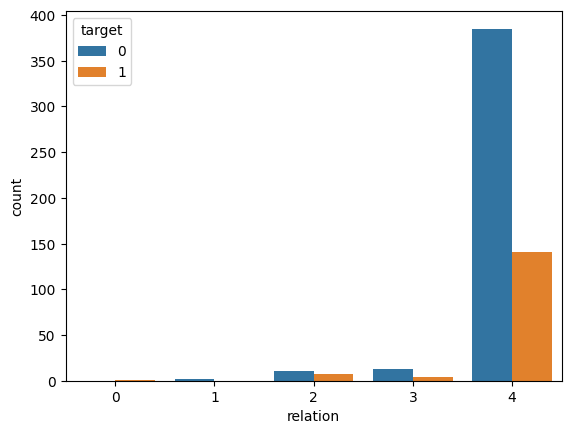

In [246]:
sns.countplot(x='relation', hue='target', data=df)
plt.show()

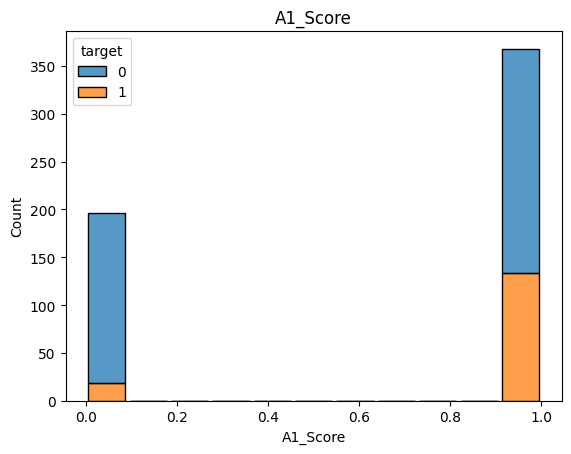

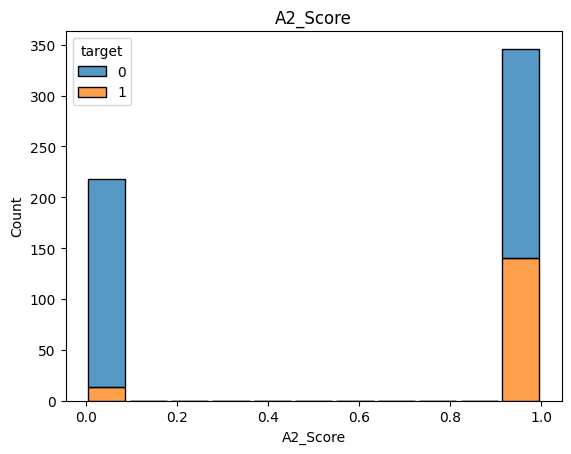

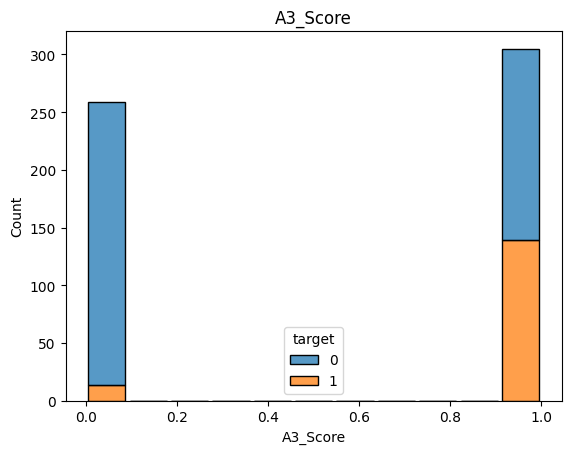

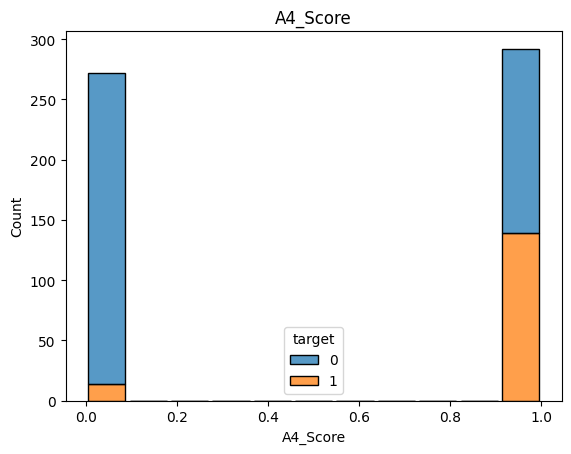

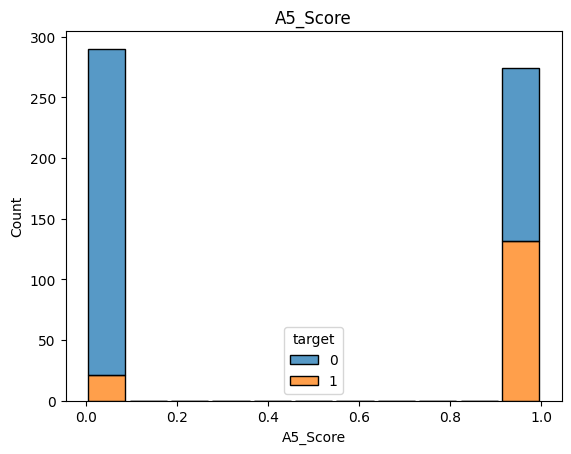

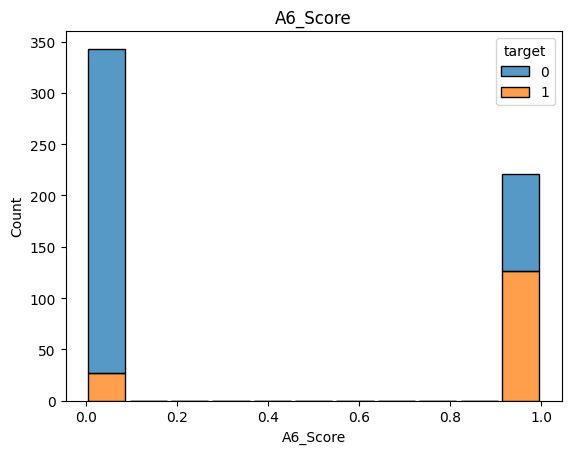

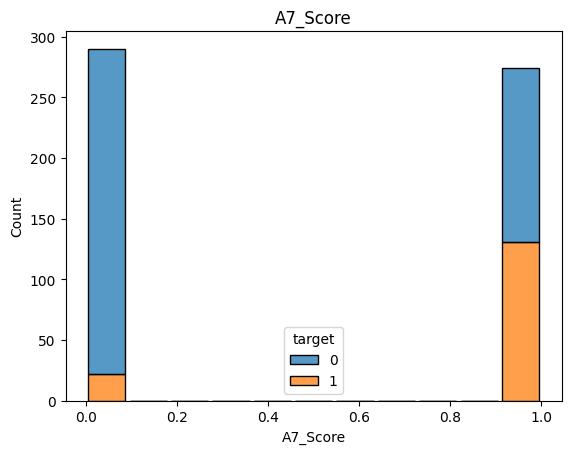

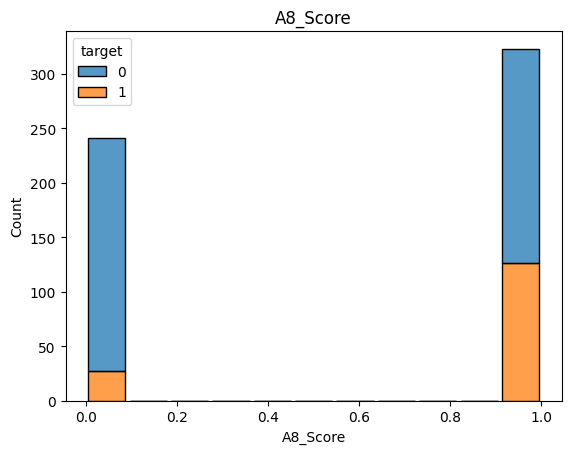

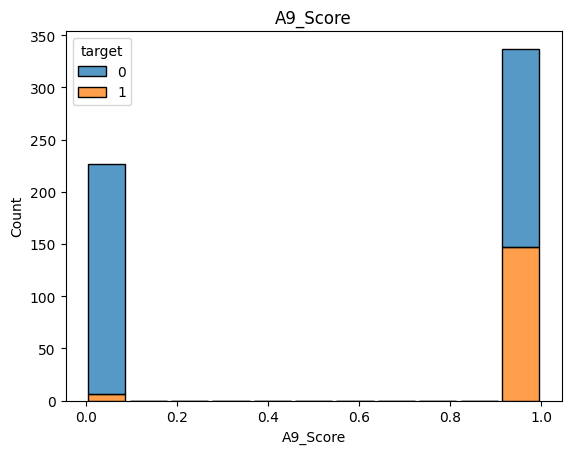

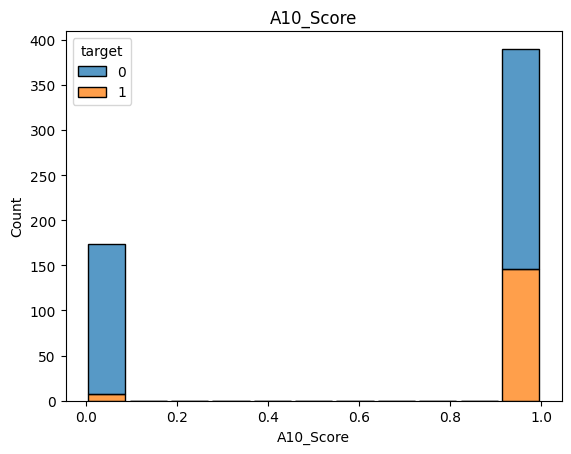

In [247]:
for a in [f'A{i}_Score' for i in range(1,11)]:
    sns.histplot(df, x=a, hue='target', multiple='stack', shrink=0.9)
    plt.title(a)
    plt.show()

FEATURE ENGINEERING

In [248]:
df['total_A_score'] = df[[f'A{i}_Score' for i in range(1, 11)]].sum(axis=1)
df['mean_A_score'] = df[[f'A{i}_Score' for i in range(1, 11)]].mean(axis=1)
df['std_A_score'] = df[[f'A{i}_Score' for i in range(1, 11)]].std(axis=1)

In [249]:
df['A_score_high_flag'] = (df['total_A_score'] >= 6).astype(int)

# DATA PREPARATION

In [250]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,jaundice,austim,contry_of_res,relation,target,age_scaled,total_A_score,mean_A_score,std_A_score,A_score_high_flag
2,3,1,1,1,1,1,1,1,1,1,...,0,1,52,4,1,-1.299647,10,1.0,0.000000,1
5,6,1,0,0,0,0,1,0,0,1,...,0,0,30,4,0,0.169173,4,0.4,0.516398,0
6,7,1,0,0,0,0,0,1,1,1,...,0,0,51,4,0,-0.019390,4,0.4,0.516398,0
7,8,1,1,1,1,1,1,1,0,1,...,0,1,52,4,1,-0.137605,9,0.9,0.316228,1
8,9,1,1,1,1,0,0,0,1,1,...,0,0,12,4,0,1.183489,7,0.7,0.483046,1


In [251]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODELLING

In [261]:
# Logistic Regression
lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        85
           1       0.59      0.68      0.63        28

    accuracy                           0.81       113
   macro avg       0.74      0.76      0.75       113
weighted avg       0.82      0.81      0.81       113

ROC-AUC: 0.8718487394957983


In [254]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        85
           1       0.59      0.57      0.58        28

    accuracy                           0.80       113
   macro avg       0.73      0.72      0.72       113
weighted avg       0.79      0.80      0.80       113

ROC-AUC: 0.8716386554621849


In [255]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# For Logistic Regression
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_scores = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')
print("Logistic Regression average ROC-AUC:", lr_scores.mean())

# For Random Forest
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
print("Random Forest average ROC-AUC:", rf_scores.mean())

Logistic Regression average ROC-AUC: 0.8744205776686605
Random Forest average ROC-AUC: 0.8756071334906897


SAVE MODEL

In [256]:
import joblib
joblib.dump(lr, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']